In [11]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

import simulations as sim
import reconstruct_video as rv

In [32]:
# generate the data
num_frame = 100
video = sim.make_rotating_square(num_frame, 0.1, 180, sigma=1)

# format the data
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)

# Shuffle rows of X
# np.random.shuffle(X)

In [33]:
# apply isomap
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)

# Reconstruct order of frames
frame_order = rv.reconstruct_frame_order(X_iso)

In [34]:
frame_order

array([68, 67, 66, 65, 64, 63, 62, 60, 61, 59, 58, 57, 56, 54, 53, 55, 52,
       51, 50, 49, 48, 47, 46, 45, 44, 43, 41, 42, 95, 94, 97, 93, 96, 99,
       98, 92, 82, 81, 83, 84, 80, 85, 77, 79, 78, 87, 86, 75, 76, 88, 74,
       89, 73, 72, 90, 91, 40, 38, 39, 37, 34, 35, 36, 33, 32, 30, 31, 29,
       28, 27, 26, 25, 24, 22, 23, 21, 19, 20, 18, 17, 16, 15, 14, 12, 13,
       11, 10,  7,  9,  6,  8,  5,  4,  2], dtype=int64)

In [35]:
# take only every 10th sample
X_iso = X_iso[1::5]
labels = range(0,num_frame)
labels = labels[1::5]

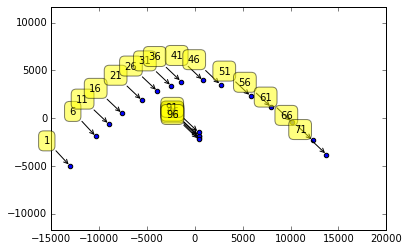

In [36]:
plt.scatter(X_iso[:,0], X_iso[:,1])
plt.axis('equal')
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
